In [ ]:
pip install tensorflow scikit-learn numpy pandas


In [ ]:
pip install tslearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import pandas as pd
import tensorflow_datasets as tfds
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tslearn.datasets import UCR_UEA_datasets

In [ ]:
ucr = UCR_UEA_datasets()
X_train, Y_train, X_test, Y_test = ucr.load_dataset("ECG5000")


In [ ]:
import numpy as np

# Combine training and testing data
X = np.concatenate((X_train, X_test), axis=0)  # Combines all ECG signals
Y = np.concatenate((Y_train, Y_test), axis=0)  # Combines all labels


In [ ]:
# Normalize X and encode y
X = X / np.max(np.abs(X))  # normalize
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
Y = to_categorical(Y)  # one-hot encode


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

In [ ]:
model = Sequential([
    Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 136, 64)             │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 68, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 68, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 66, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 33, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 33, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4224)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         270,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 295,813 (1.13 MB)

 Trainable params: 295,813 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.7421 - loss: 0.8181 - val_accuracy: 0.9300 - val_loss: 0.2662
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9258 - loss: 0.2423 - val_accuracy: 0.9500 - val_loss: 0.2301
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9402 - loss: 0.2089 - val_accuracy: 0.9475 - val_loss: 0.2076
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9437 - loss: 0.1839 - val_accuracy: 0.9500 - val_loss: 0.1865
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9567 - loss: 0.1520 - val_accuracy: 0.9500 - val_loss: 0.1962
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9528 - loss: 0.1698 - val_accuracy: 0.9550 - val_loss: 0.1798
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9571 - loss: 0.1479 - val_accuracy: 0.9575 - val_loss: 0.1764
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9516 - loss: 0.1638 - val_accuracy: 0.9600 - v

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {acc:.4f}")


✅ Test Accuracy: 0.9480


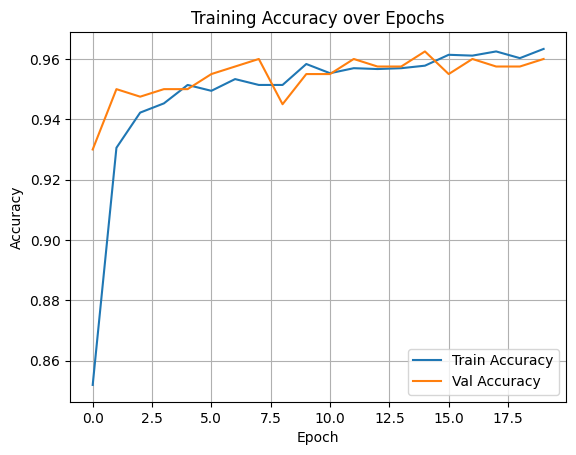

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()